<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 154.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 143.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 141.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 137.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 142.7 MB/s eta 0:00:00


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


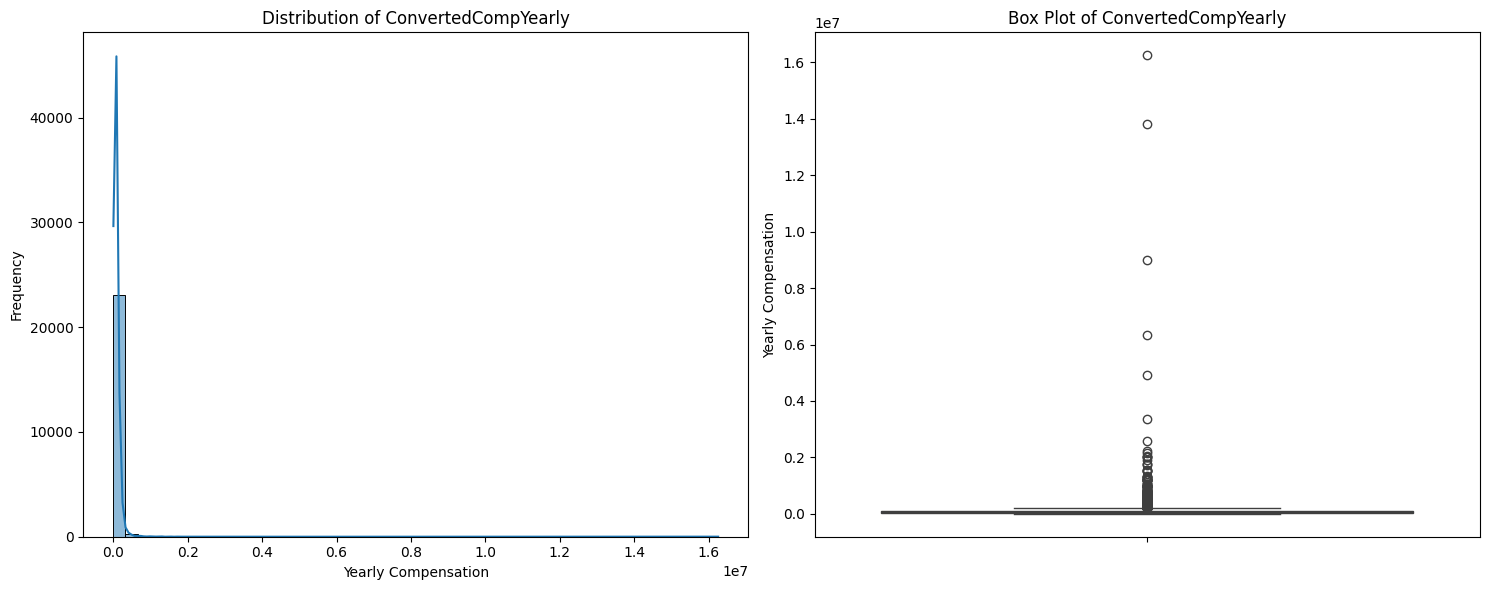

Basic statistics for ConvertedCompYearly:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


In [3]:
# Task: Plot distribution and histogram for ConvertedCompYearly
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

# Create subplot with 2 plots side by side
plt.subplot(1, 2, 1)
# Distribution plot (density curve)
sns.histplot(df['ConvertedCompYearly'].dropna(), kde=True, bins=50)
plt.title('Distribution of ConvertedCompYearly')
plt.xlabel('Yearly Compensation')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
# Box plot to show quartiles and outliers
sns.boxplot(y=df['ConvertedCompYearly'].dropna())
plt.title('Box Plot of ConvertedCompYearly')
plt.ylabel('Yearly Compensation')

plt.tight_layout()
plt.show()

# Display basic statistics
print("Basic statistics for ConvertedCompYearly:")
print(df['ConvertedCompYearly'].describe())

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [4]:
# Task: Calculate median compensation for "Employed, full-time" respondents
# Filter data for full-time employees
full_time_employees = df[df['Employment'] == 'Employed, full-time']

# Calculate median compensation for full-time employees
median_compensation_fulltime = full_time_employees['ConvertedCompYearly'].median()

print(f"Number of full-time employees: {len(full_time_employees)}")
print(f"Median compensation for full-time employees: ${median_compensation_fulltime:,.2f}")

# Additional statistics for context
print("\nFull-time employee compensation statistics:")
print(full_time_employees['ConvertedCompYearly'].describe())

Number of full-time employees: 39041
Median compensation for full-time employees: $69,814.00

Full-time employee compensation statistics:
count    1.758600e+04
mean     8.892111e+04
std      1.311224e+05
min      1.000000e+00
25%      3.866600e+04
50%      6.981400e+04
75%      1.116902e+05
max      9.000000e+06
Name: ConvertedCompYearly, dtype: float64


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



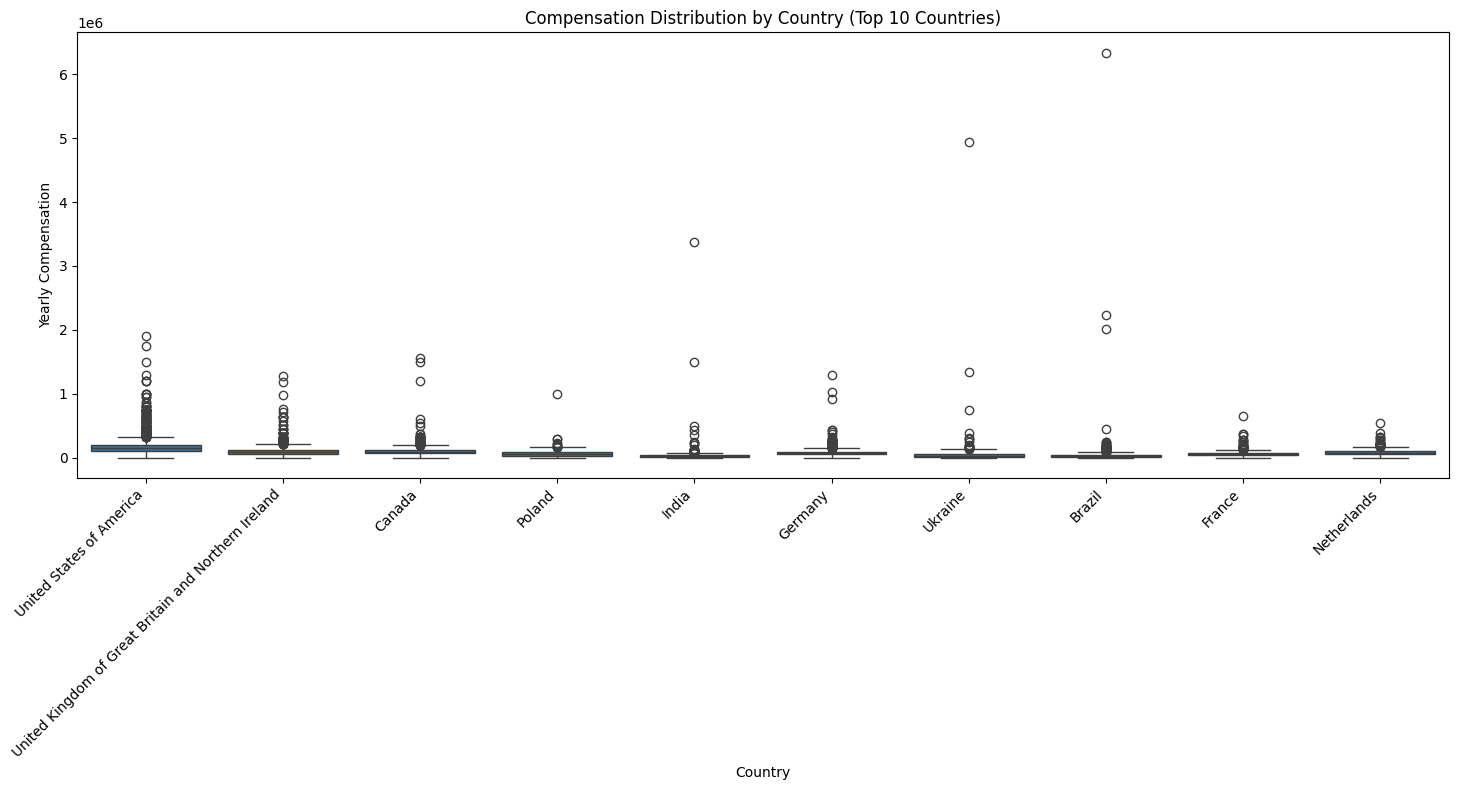

Median compensation by country:
Country
United States of America                                143000.0
Canada                                                   87231.0
United Kingdom of Great Britain and Northern Ireland     84076.0
Germany                                                  73036.0
Netherlands                                              69814.0
Poland                                                   55535.5
France                                                   53703.0
Ukraine                                                  26903.5
Brazil                                                   23945.0
India                                                    16749.0
Name: ConvertedCompYearly, dtype: float64


In [5]:
# Task: Explore compensation range by country using box plots
# Get top 10 countries by number of respondents for better visualization
top_countries = df['Country'].value_counts().head(10).index.tolist()

# Filter data for top countries
df_top_countries = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_top_countries, x='Country', y='ConvertedCompYearly')
plt.xticks(rotation=45, ha='right')
plt.title('Compensation Distribution by Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Yearly Compensation')
plt.tight_layout()
plt.show()

# Display median compensation by country
print("Median compensation by country:")
country_compensation = df_top_countries.groupby('Country')['ConvertedCompYearly'].median().sort_values(ascending=False)
print(country_compensation)

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [6]:
# Task: Remove outliers from ConvertedCompYearly using IQR method
# Calculate Q1, Q3, and IQR for ConvertedCompYearly
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: ${Q1:,.2f}")
print(f"Q3: ${Q3:,.2f}")
print(f"IQR: ${IQR:,.2f}")
print(f"Lower bound: ${lower_bound:,.2f}")
print(f"Upper bound: ${upper_bound:,.2f}")

# Create refined dataset by removing outliers
df_refined = df[(df['ConvertedCompYearly'] >= lower_bound) & 
                (df['ConvertedCompYearly'] <= upper_bound)].copy()

print(f"\nOriginal dataset size: {len(df)}")
print(f"Refined dataset size (outliers removed): {len(df_refined)}")
print(f"Outliers removed: {len(df) - len(df_refined)} ({((len(df) - len(df_refined))/len(df)*100):.1f}%)")

Q1: $32,712.00
Q3: $107,971.50
IQR: $75,259.50
Lower bound: $-80,177.25
Upper bound: $220,860.75

Original dataset size: 65437
Refined dataset size (outliers removed): 22457
Outliers removed: 42980 (65.7%)


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


Correlation Matrix:
                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.406993       -0.059643
WorkExp                         0.406993  1.000000       -0.032388
JobSatPoints_1                 -0.059643 -0.032388        1.000000


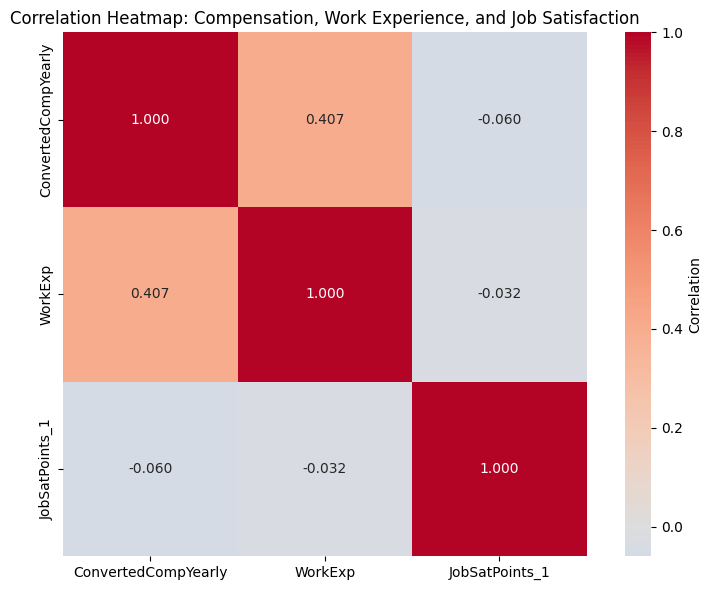


Specific Correlations:
ConvertedCompYearly vs WorkExp: 0.407
ConvertedCompYearly vs JobSatPoints_1: -0.060
WorkExp vs JobSatPoints_1: -0.032


In [7]:
# Task: Calculate correlations and create heatmap
# Select columns for correlation analysis
correlation_columns = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']

# Filter out rows with missing values for these columns
df_correlation = df_refined[correlation_columns].dropna()

# Calculate correlation matrix
correlation_matrix = df_correlation.corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap: Compensation, Work Experience, and Job Satisfaction')
plt.tight_layout()
plt.show()

# Print specific correlations
print(f"\nSpecific Correlations:")
print(f"ConvertedCompYearly vs WorkExp: {correlation_matrix.loc['ConvertedCompYearly', 'WorkExp']:.3f}")
print(f"ConvertedCompYearly vs JobSatPoints_1: {correlation_matrix.loc['ConvertedCompYearly', 'JobSatPoints_1']:.3f}")
print(f"WorkExp vs JobSatPoints_1: {correlation_matrix.loc['WorkExp', 'JobSatPoints_1']:.3f}")

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


NameError: name 'np' is not defined

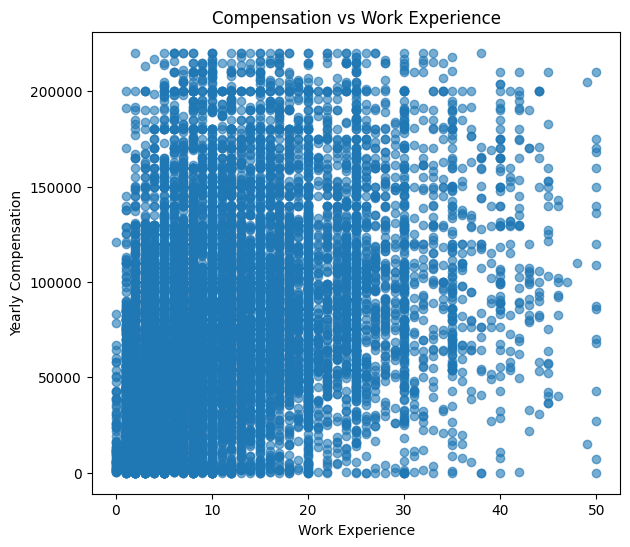

In [8]:
# Task: Create scatter plots for specific correlations
plt.figure(figsize=(15, 6))

# Scatter plot 1: ConvertedCompYearly vs WorkExp
plt.subplot(1, 2, 1)
plt.scatter(df_correlation['WorkExp'], df_correlation['ConvertedCompYearly'], alpha=0.6)
plt.xlabel('Work Experience')
plt.ylabel('Yearly Compensation')
plt.title('Compensation vs Work Experience')

# Add trend line
z = np.polyfit(df_correlation['WorkExp'].dropna(), 
               df_correlation['ConvertedCompYearly'][df_correlation['WorkExp'].notna()], 1)
p = np.poly1d(z)
plt.plot(df_correlation['WorkExp'], p(df_correlation['WorkExp']), "r--", alpha=0.8)

# Scatter plot 2: ConvertedCompYearly vs JobSatPoints_1
plt.subplot(1, 2, 2)
plt.scatter(df_correlation['JobSatPoints_1'], df_correlation['ConvertedCompYearly'], alpha=0.6)
plt.xlabel('Job Satisfaction Points')
plt.ylabel('Yearly Compensation')
plt.title('Compensation vs Job Satisfaction')

# Add trend line
z2 = np.polyfit(df_correlation['JobSatPoints_1'].dropna(), 
                df_correlation['ConvertedCompYearly'][df_correlation['JobSatPoints_1'].notna()], 1)
p2 = np.poly1d(z2)
plt.plot(df_correlation['JobSatPoints_1'], p2(df_correlation['JobSatPoints_1']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# Calculate and display correlation coefficients
import numpy as np
corr_workexp = np.corrcoef(df_correlation['WorkExp'].dropna(), 
                           df_correlation['ConvertedCompYearly'][df_correlation['WorkExp'].notna()])[0,1]
corr_jobsat = np.corrcoef(df_correlation['JobSatPoints_1'].dropna(), 
                          df_correlation['ConvertedCompYearly'][df_correlation['JobSatPoints_1'].notna()])[0,1]

print(f"Correlation between Compensation and Work Experience: {corr_workexp:.3f}")
print(f"Correlation between Compensation and Job Satisfaction: {corr_jobsat:.3f}")

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
